# 1) Завантажити дані, вивести назви колонок і розмір датасета

In [89]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [90]:
!pip install pandas 

Defaulting to user installation because normal site-packages is not writeable


In [91]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [92]:
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv("Life Expectancy Data.csv")

In [93]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# 2) Опрацювати пропуски (по можливості заповнити їх або видалити)

In [94]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [95]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
df_nan = df.isnull().sum()
list_col_to_fill = list(df_nan[df_nan > 0].index)
for cl_n in list_col_to_fill:
    df[cl_n] = imputer.fit_transform(df[[cl_n]])

In [96]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [97]:
'''
Перетворимо таргет на 3 класи
'''
def classify_life_expectancy(value):
    if value < 60:
        return 0  # Низька тривалість життя
    elif 60 <= value <= 75:
        return 1  # Середня тривалість життя
    else:
        return 2  # Висока тривалість життя

df['Life expectancy '] = df['Life expectancy '].apply(classify_life_expectancy)

print(df['Life expectancy '].value_counts())

Life expectancy 
1    1525
2     824
0     589
Name: count, dtype: int64


# 3) Візуалізувати дані: 

побудувати графік (heatmap), що відображає кореляції
ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
обмежитися декількома)

In [98]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


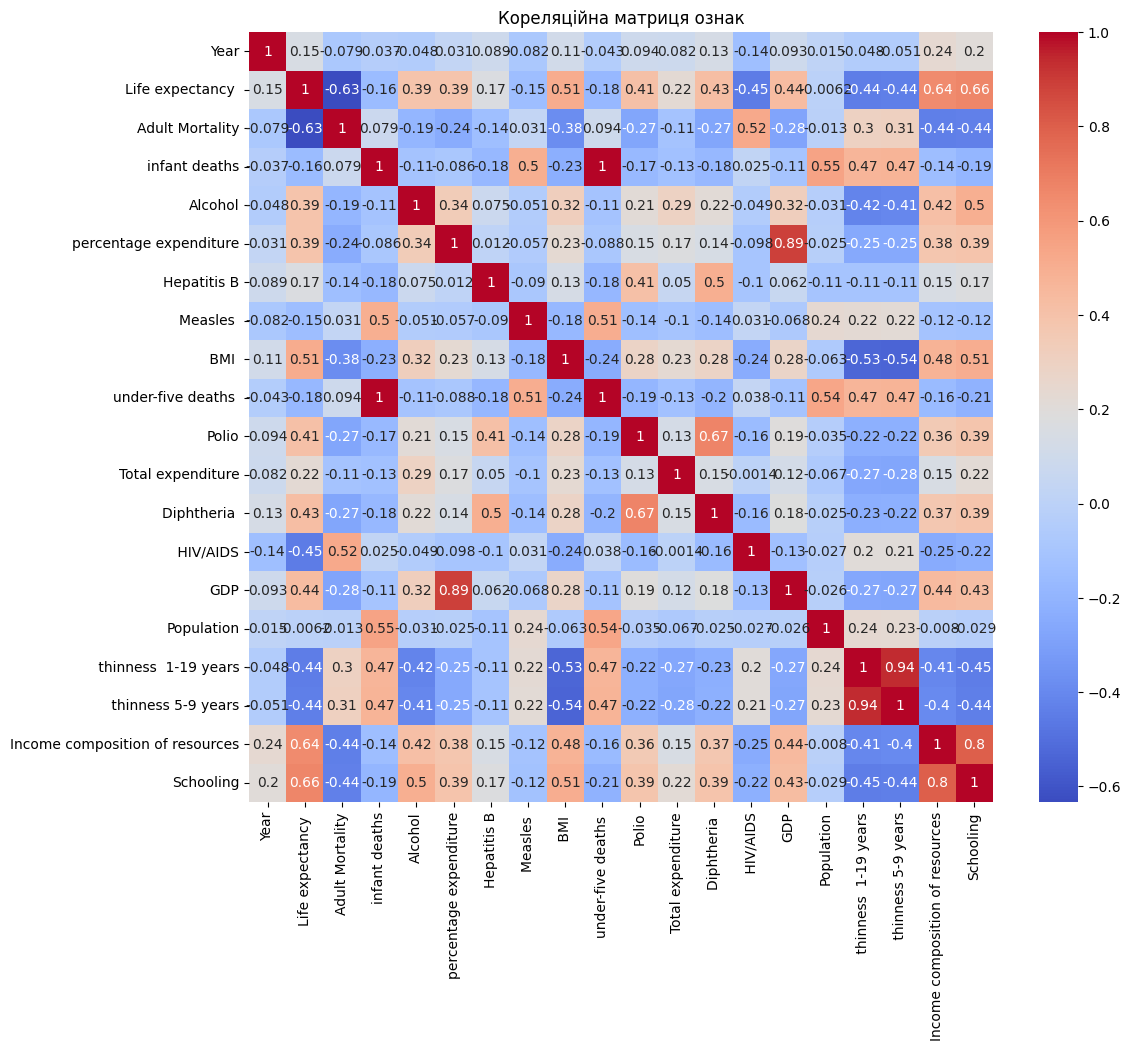

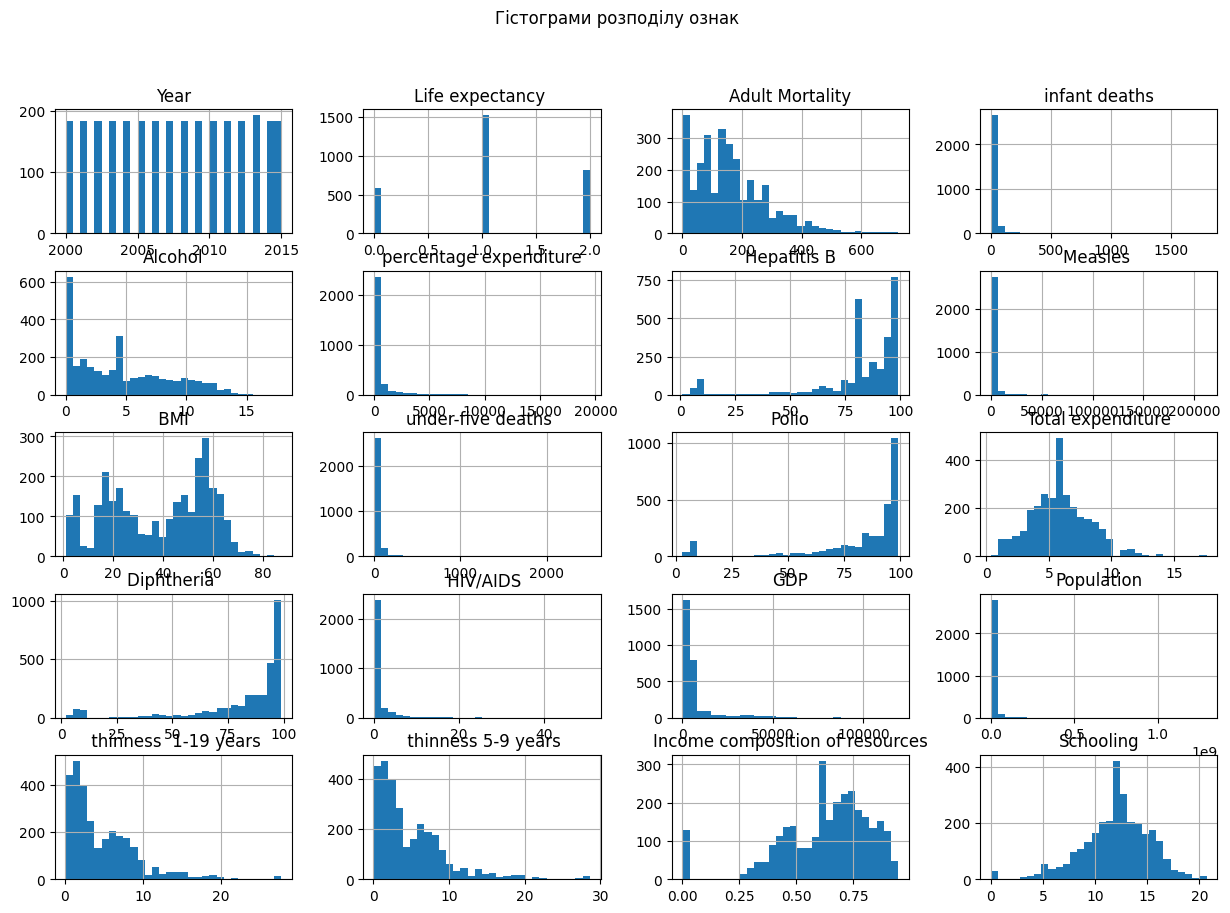

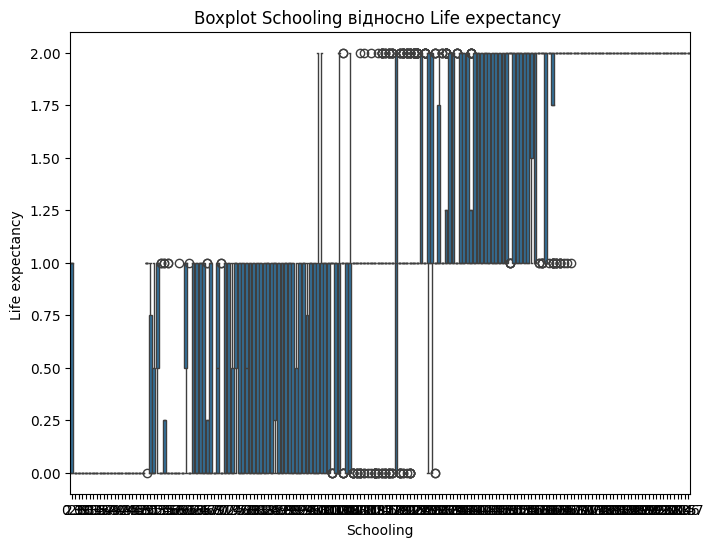

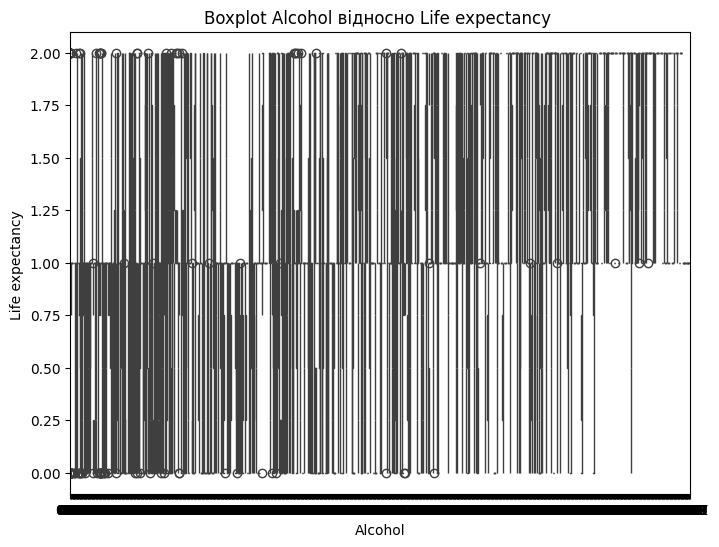

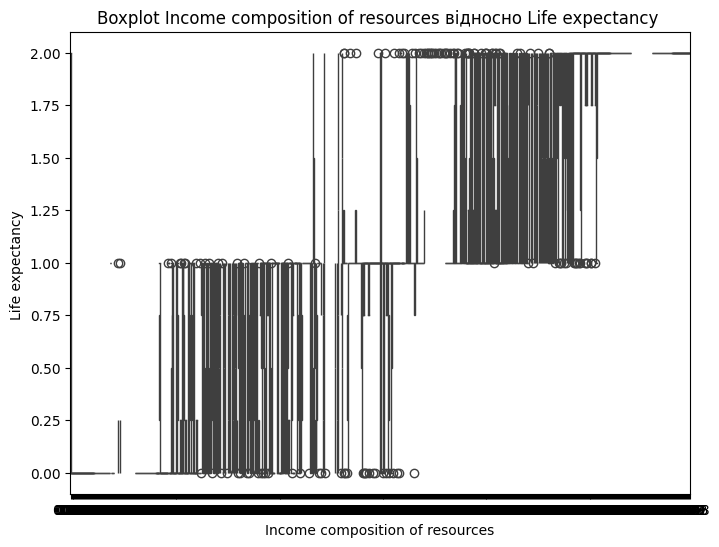

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця ознак')
plt.show()

df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Гістограми розподілу ознак')
plt.show()

target = 'Life expectancy '
features = ['Schooling', 'Alcohol', 'Income composition of resources'] 
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], y=df[target])
    plt.title(f'Boxplot {feature} відносно {target}')
    plt.show()


# 4) Нормалізувати дані

In [101]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('Life expectancy ')
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [102]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

Типи даних:
 Country                             object
Year                               float64
Status                              object
Life expectancy                      int64
Adult Mortality                    float64
infant deaths                      float64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                            float64
 BMI                               float64
under-five deaths                  float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object
Категоріальні колонки:
 Ind

# 5) Провести навчання наступних класифікаторів:

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score

X = df_encoded.drop(columns=[target])
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_classification_model(model, X_test, y_test):
    # Передбачення
    y_pred = model.predict(X_test)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


## kNN та пошук оптимальних параметрів

kNN Найкращі параметри: {'n_neighbors': 1}
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       119
           1       0.92      0.92      0.92       304
           2       0.91      0.92      0.91       165

    accuracy                           0.92       588
   macro avg       0.92      0.92      0.92       588
weighted avg       0.92      0.92      0.92       588



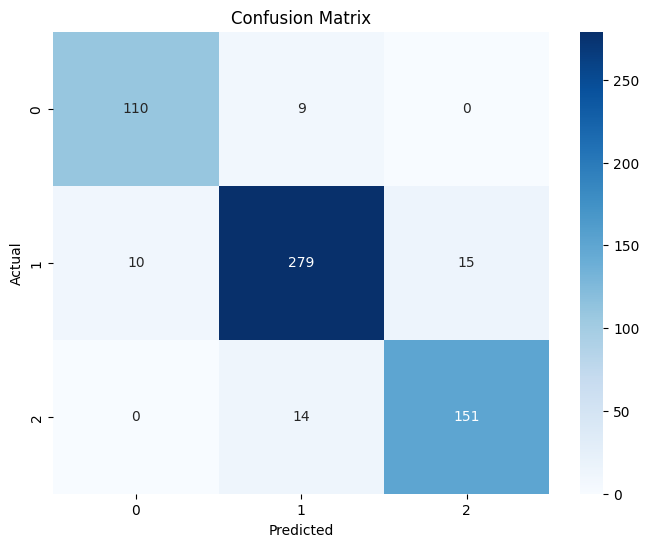

In [106]:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': range(1, 31)}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
print("kNN Найкращі параметри:", grid_knn.best_params_)
evaluate_classification_model(grid_knn.best_estimator_, X_test, y_test)


## дерево ухвалення рішень

Decision Tree:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       119
           1       0.92      0.91      0.92       304
           2       0.91      0.93      0.92       165

    accuracy                           0.91       588
   macro avg       0.91      0.92      0.91       588
weighted avg       0.92      0.91      0.91       588



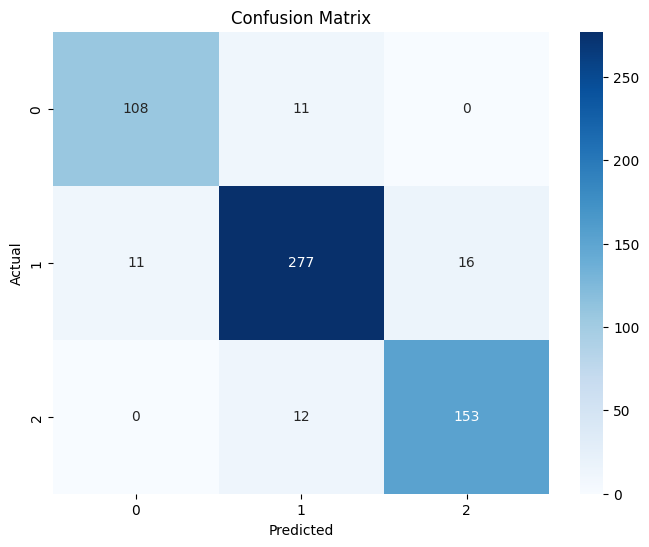

In [111]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("Decision Tree:")
evaluate_classification_model(dt, X_test, y_test)

## SVM та пошук оптимальних параметрів

SVM Найкращі параметри: {'C': 10, 'gamma': 'scale'}
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       119
           1       0.92      0.96      0.94       304
           2       0.97      0.88      0.92       165

    accuracy                           0.94       588
   macro avg       0.94      0.93      0.94       588
weighted avg       0.94      0.94      0.94       588



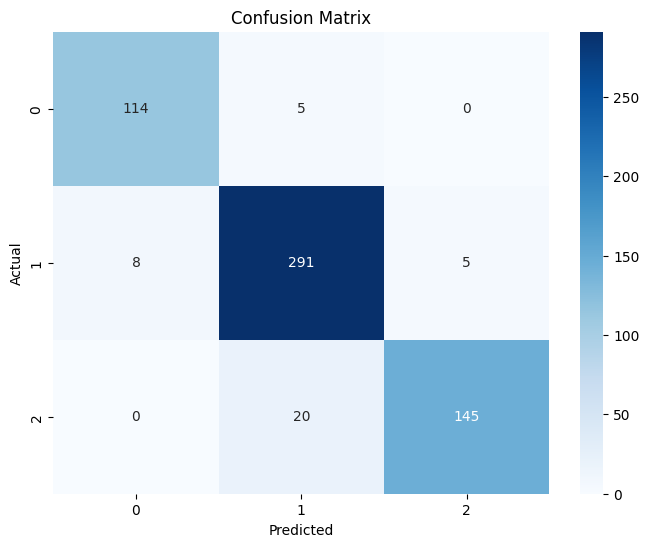

In [112]:
svm = SVC()
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)
print("SVM Найкращі параметри:", grid_svm.best_params_)
evaluate_classification_model(grid_svm.best_estimator_, X_test, y_test)

## Random Forest

Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       119
           1       0.93      0.97      0.95       304
           2       0.99      0.88      0.93       165

    accuracy                           0.95       588
   macro avg       0.95      0.94      0.95       588
weighted avg       0.95      0.95      0.95       588



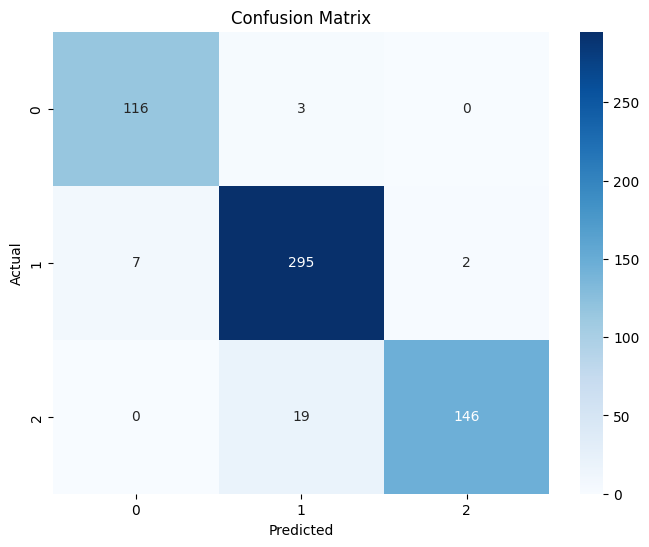

In [113]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Random Forest:")
evaluate_classification_model(rf, X_test, y_test)

## AdaBoost

C:\Users\v1415\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       119
           1       0.86      0.40      0.54       304
           2       0.50      0.94      0.65       165

    accuracy                           0.65       588
   macro avg       0.72      0.75      0.68       588
weighted avg       0.75      0.65      0.64       588



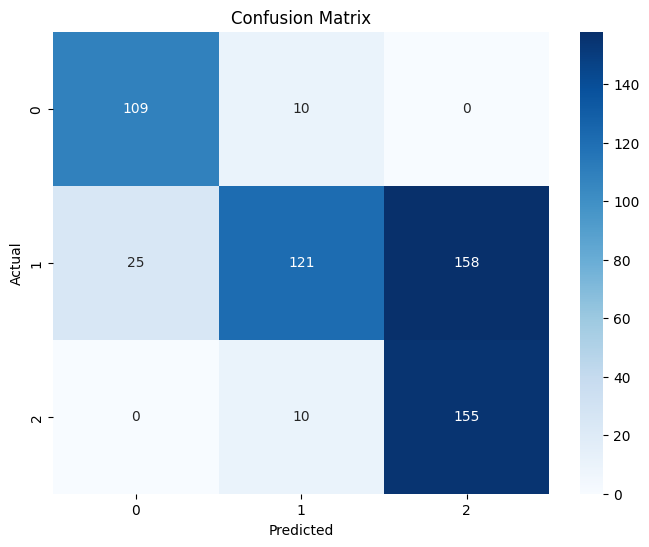

In [114]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)
print("AdaBoost:")
evaluate_classification_model(ab, X_test, y_test)

# Серед обраних оптимальних моделей кожного класу вибрати найкращу.

## Найкраща модель - Random Forest, якщо будемо орієнтуватися по f1-score